In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
with open("new_data/total.pkl","rb") as f:
    data = pkl.load(f)
right_data, left_data, keep_data = data['right'], data['left'], data['keep']
print(right_data.shape,left_data.shape,keep_data.shape)

(66470, 9, 16, 2) (72709, 9, 16, 2) (771850, 9, 16, 2)


In [60]:
def plot_batch(one_batch,figsize=(10,10),alpha=0.5):
    fig = plt.figure(figsize=figsize)
    for i, seq in enumerate(one_batch):
        mask = (seq!=0)
        if mask.sum()==0:
            continue      
        hist_seq,fut_seq = seq[:6],seq[6:]
        if i == 0:
            plt.scatter(hist_seq[:,0],hist_seq[:,1],c="orange",label="hist",lw=3)
            plt.scatter(fut_seq[:,0],fut_seq[:,1],c="green",label="future",lw=3,ls='--')
#             plt.gca().add_patch(patches.Rectangle((seq[5,0]-10, seq[5,1]-0.05), 10, 0.1,edgecolor="black",facecolor="orange"))
            plt.text(x= seq[5,0]-5, y = seq[5,1]-0.2,s=f"{i}",fontsize=12,fontweight="bold", horizontalalignment='center')
        elif i == 1:
            hist_mask,fut_mask = (hist_seq!=0),(fut_seq!=0)
            mhist_seq = hist_seq[hist_mask].reshape(-1,2)
            mfut_seq = fut_seq[fut_mask].reshape(-1,2)  
            # plot hist
            if hist_mask.sum()==0:
                pass
            else:
                plt.scatter(mhist_seq[:,0],mhist_seq[:,1],c="blue",label="neighbor hist",alpha=alpha+0.3,lw=3)
            # plot future
            if fut_mask.sum()==0:
                pass
            else:
                plt.scatter(mfut_seq[:,0],mfut_seq[:,1],c="blue",label="neighbor future",alpha=alpha,lw=3,ls='--')
            #plot current
            if (seq[5]!=0).all():
#                 plt.gca().add_patch(patches.Rectangle((seq[5,0]-10, seq[5,1]-0.05), 10, 0.1,edgecolor="black",facecolor="blue"))
                plt.text(x= seq[5,0]-5, y = seq[5,1]-0.2,s=f"{i}",fontsize=12,fontweight="bold", horizontalalignment='center')
        else:
            hist_mask,fut_mask = (hist_seq!=0).any(axis=1),(fut_seq!=0).any(axis=1)
            mhist_seq = hist_seq[hist_mask].reshape(-1,2)
            mfut_seq = fut_seq[fut_mask].reshape(-1,2)  
            # plot hist
            if hist_mask.sum()==0:
                pass
            else:
                plt.scatter(mhist_seq[:,0],mhist_seq[:,1],c="blue",alpha=alpha+0.3,lw=3)
            # plot future
            if fut_mask.sum()==0:
                pass
            else:
                plt.scatter(mfut_seq[:,0],mfut_seq[:,1],c="blue",alpha=alpha,lw=3,ls='--')
            #plot current
            if (seq[5]!=0).all():
#                 plt.gca().add_patch(patches.Rectangle((seq[5,0]-10, seq[5,1]-0.05), 10, 0.1,edgecolor="black",facecolor="blue"))
                plt.text(x= seq[5,0]-5, y = seq[5,1]-0.2,s=f"{i}",fontsize=12,fontweight="bold", horizontalalignment='center')
    plt.legend(loc="best")
    return fig

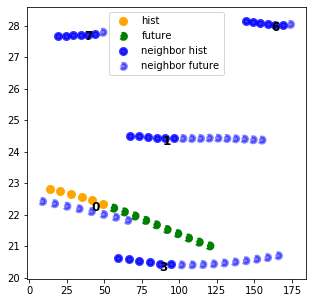

In [61]:
plot_batch(right_data[7750],figsize=(5,5))
plt.show()

In [62]:
for i in range(0,right_data.shape[0],30):
    plot_batch(right_data[i],figsize=(5,5))
    plt.savefig(f"temp/right_pic/{i}.png")
    plt.close("all")